In [3]:
import pandas as pd
PATH ="data/"
FILE_NAME = "haberman.csv"

columns = ["age","year", "nodes", "class"]

df = pd.read_csv(PATH + FILE_NAME,header=None, names=columns)

In [4]:
df

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
df.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


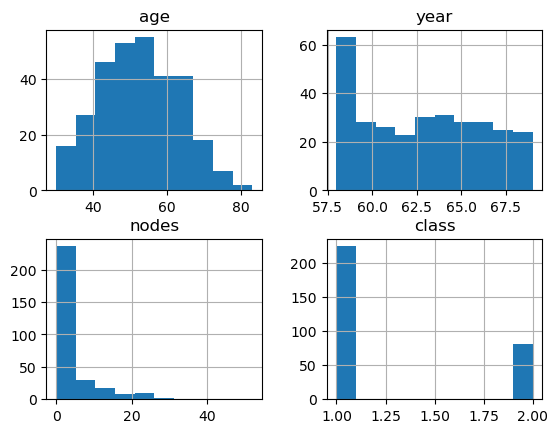

In [6]:
import matplotlib.pyplot as pyplot
df.hist()
pyplot.show()

In [7]:
# summarize the class distribution
from collections import Counter


target = df['class'].values
counter = Counter(target)
for k,v in counter.items():
  per = v / len(target) * 100
  print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))


Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [10]:
# baseline model and test harness for the haberman dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path,header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
  # calculate reference brier score
  ref_probs = [0.26471 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)
  # calculate model brier score
  bs_model = brier_score_loss(y_true, y_prob)
  # calculate skill score
  return 1.0 - (bs_model / bs_ref)
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(brier_skill_score, needs_proba=True)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores
# define the location of the dataset
full_path = PATH + FILE_NAME
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='prior') # evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean BSS: -0.000 (0.000)


>LR 0.060 (0.143)
>LDA 0.064 (0.154)
>QDA 0.027 (0.221)
>GNB 0.012 (0.212)
>MNB -0.211 (0.369)
>GPC -0.142 (0.041)


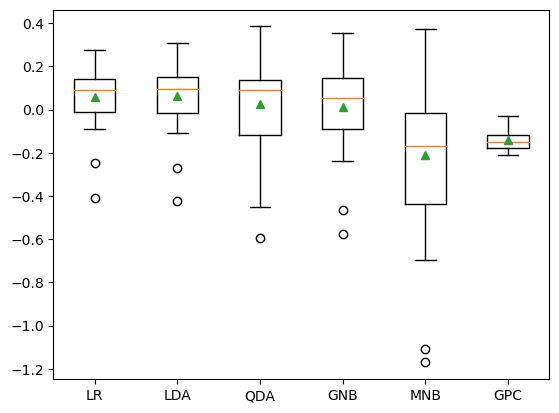

In [11]:
# compare probabilistic model on the haberman dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import brier_score_loss
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
# load the dataset
def load_dataset(full_path):
  # load the dataset as a numpy array
  data = read_csv(full_path, header=None)
  # retrieve numpy array
  data = data.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # label encode the target variable to have the classes 0 and 1
  y = LabelEncoder().fit_transform(y)
  return X, y
# calculate brier skill score (BSS)
def brier_skill_score(y_true, y_prob):
  # calculate reference brier score
  ref_probs = [0.26471 for _ in range(len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_probs)
  # calculate model brier score
  bs_model = brier_score_loss(y_true, y_prob)
  # calculate skill score
  return 1.0 - (bs_model / bs_ref)
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(brier_skill_score, needs_proba=True)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores
# define models to test
def get_models():
  models, names = list(), list()
  # LR 
  models.append(LogisticRegression(solver='lbfgs')) 
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis()) 
  names.append('LDA')
  # QDA
  models.append(QuadraticDiscriminantAnalysis()) 
  names.append('QDA')
  # GNB
  models.append(GaussianNB()) 
  names.append('GNB')
  # MNB
  models.append(MultinomialNB())
  names.append('MNB')
  # GPC 
  models.append(GaussianProcessClassifier()) 
  names.append('GPC')
  return models, names

# define the location of the dataset
full_path = PATH + FILE_NAME
# load the dataset
X, y = load_dataset(full_path) # define models
models, names = get_models() 
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  # summarize and store
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
